In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:

data = df[['longitude', 'latitude', 'median_house_value']]
data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


In [7]:
data.isnull().sum()

longitude             0
latitude              0
median_house_value    0
dtype: int64

<Axes: xlabel='longitude', ylabel='latitude'>

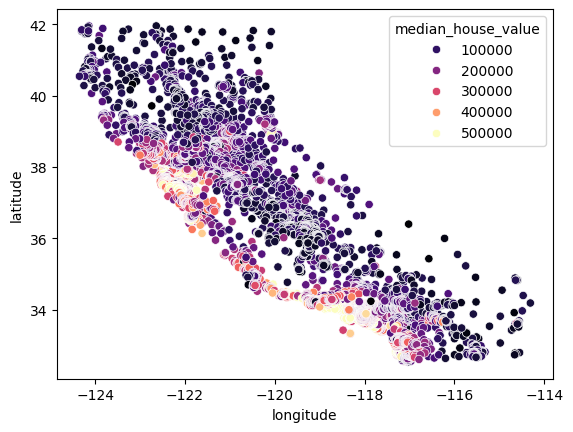

In [5]:
import seaborn as sns

sns.scatterplot(data= data, x= 'longitude', y='latitude', hue = 'median_house_value', palette="magma")

<Axes: >

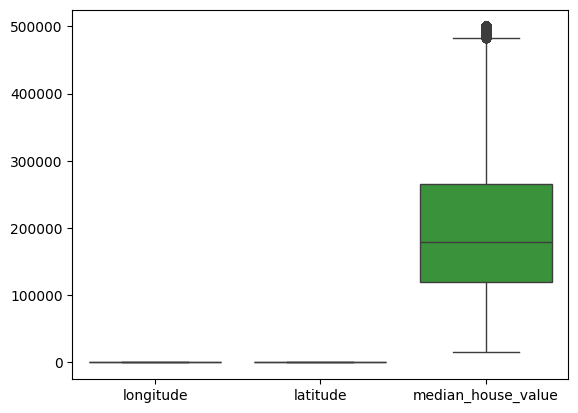

In [8]:
sns.boxplot(data)

## split features into x and y

In [9]:
X= data.drop(['median_house_value'], axis=1)
y= data['median_house_value']

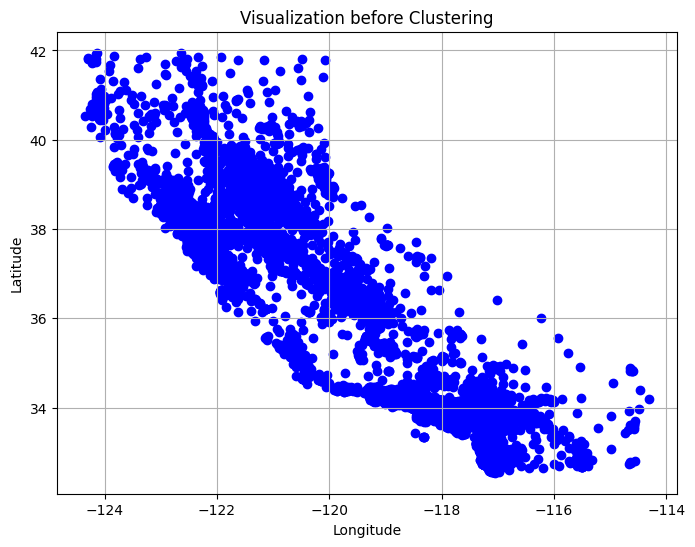

In [11]:
#visualization before clustering
plt.figure(figsize=(8,6))
plt.scatter(X['longitude'], X['latitude'], color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Visualization before Clustering')
plt.grid()
plt.show()

In [12]:
#NORMALIZE FEATURES IN X
from sklearn.preprocessing import normalize
X_new= normalize (X, norm='l2', axis=0)
X_new

array([[-0.00711444,  0.00738648],
       [-0.00711386,  0.00738258],
       [-0.00711502,  0.00738063],
       ...,
       [-0.00705565,  0.00768873],
       [-0.00706148,  0.00768873],
       [-0.00705682,  0.00767703]])

## TRAIN MODEL USING KMEANS

In [13]:
# Create object of the model
kmeans= KMeans(n_clusters=8, random_state=42, n_init='auto')

# Fit the model
kmeans.fit(X_new)
kmeans

KMeans(n_init='auto', random_state=42)

In [14]:
# Check for labels
labels= kmeans.predict(X_new)
labels

array([1, 1, 1, ..., 4, 4, 4])

In [15]:
# Check clusters
kmeans.labels_

array([1, 1, 1, ..., 4, 4, 4])

In [16]:
# Check for Centriods
centroids= kmeans.cluster_centers_
centroids

array([[-0.00687338,  0.00662925],
       [-0.00710375,  0.00738617],
       [-0.0071325 ,  0.00789611],
       [-0.00694639,  0.00686148],
       [-0.00707915,  0.00755944],
       [-0.00680967,  0.00641014],
       [-0.00698365,  0.00713459],
       [-0.00708722,  0.00728428]])

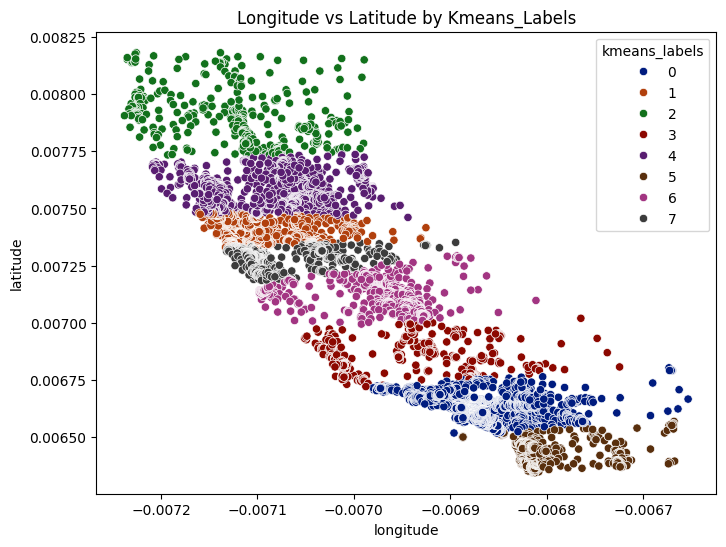

In [17]:
# SCATTER PLOT VISUALIZATION BEFORE CLUSTERING

# Convert x_new to a DataFrame
housing = pd.DataFrame(X_new, columns=["longitude", "latitude"])

# Add the cluster labels to the DataFrame
housing['kmeans_labels'] = kmeans.labels_

# Create the scatter plot
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(data=housing, x="longitude", y="latitude", hue="kmeans_labels", palette='dark')

plt.title('Longitude vs Latitude by Kmeans_Labels')
# Show the plot
plt.show()

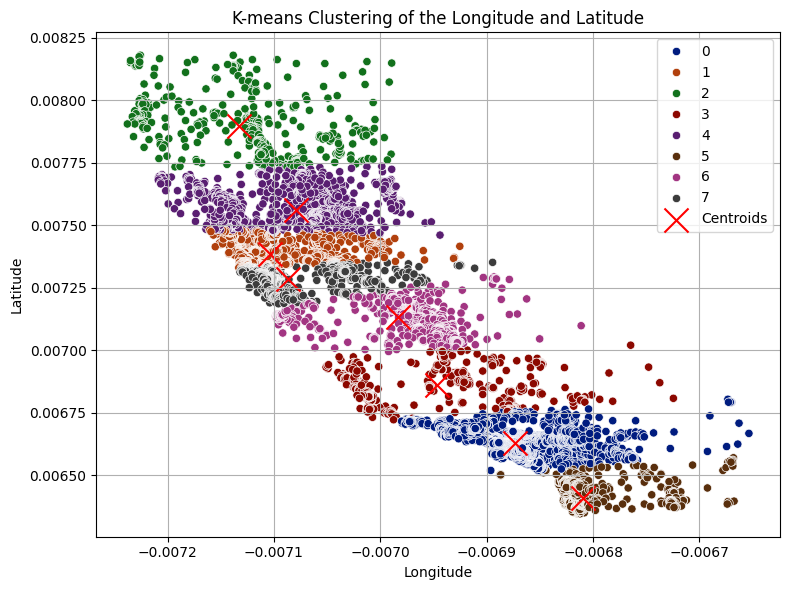

In [18]:
#AFTER CLUSTERING
# Create the scatter plot
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(data=housing, x="longitude", y="latitude", hue="kmeans_labels", palette="dark")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('K-means Clustering of the Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

## Plot the distribution of median house prices in the number of groups using a boxplot.

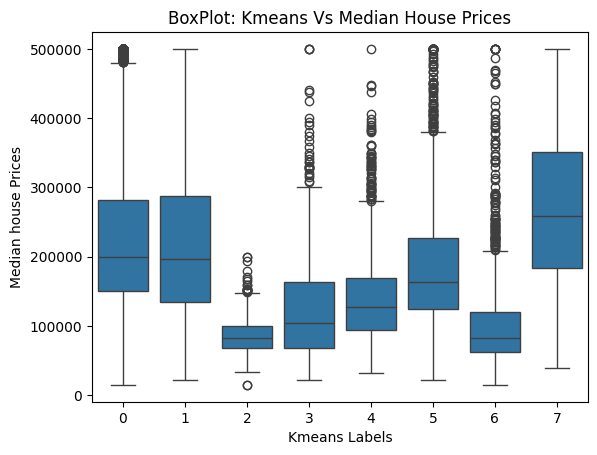

In [21]:
sns.boxplot(data= data, x = kmeans.labels_, y = data['median_house_value'])
plt.xlabel('Kmeans Labels')
plt.ylabel('Median house Prices')
plt.title('BoxPlot: Kmeans Vs Median House Prices')
plt.show()

## ELBOW METHOD

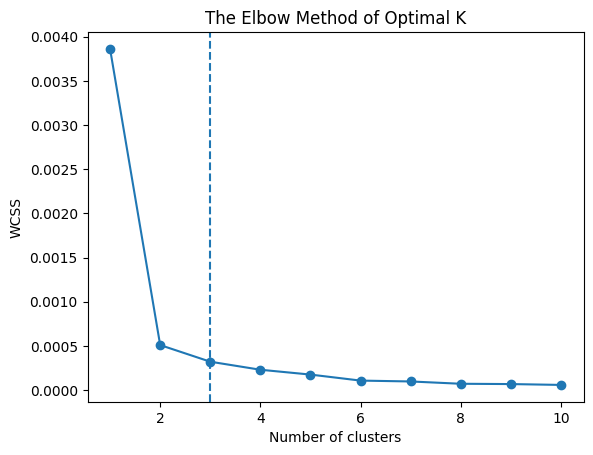

In [23]:
# Calculate total wcss and plot and plot against k

wcss = [] #wcss is the inertia values

# Initiate KMeans with current 'k'
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

# Fit the KMeans model
    kmeans.fit(X_new)

# Append the inertia values to the empty wcss list
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')

# Show Optimal K
plt.axvline(x=3, ls='--')

plt.title('The Elbow Method of Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## silhouette score

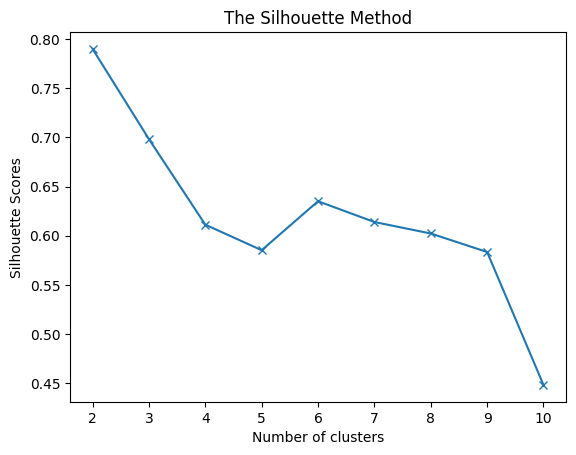

In [25]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

# Initialize KMeans with current 'k'
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

# Fit the KMeans model
    kmeans.fit(X_new)

# Compute the silhoutte score for each cluster
    score = silhouette_score(X_new, kmeans.labels_)

# Append the silhouette_scores to the list
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='x')
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()